🚀 Setup terminé
Variables d'entrée: ['u', 'v', 'temp', 'rh', 'psfc']
Variables cibles: ['pm25', 'pm10', 'so2', 'no2', 'co', 'o3']
Résolution cible: (128, 256)
Mois 201301: 744 fichiers trouvés
Mois 201302: 672 fichiers trouvés
Mois 201303: 744 fichiers trouvés
Mois 201304: 720 fichiers trouvés
Mois 201305: 744 fichiers trouvés
Mois 201306: 720 fichiers trouvés
Mois 201307: 744 fichiers trouvés
Mois 201308: 744 fichiers trouvés
Mois 201309: 720 fichiers trouvés
Mois 201310: 744 fichiers trouvés
Mois 201311: 720 fichiers trouvés
Mois 201312: 744 fichiers trouvés
Année 2013: 8760 fichiers au total
Timestamps valides pour 2013: 8760
Séquences valides pour 2013: 8752
Total séquences créées: 8752
Séquences créées: 8752
✅ Dataset créé: 8752 échantillons
📊 Shapes: torch.Size([3, 5, 128, 256]) -> torch.Size([6, 6, 128, 256])
📈 Input range: [-27.09, 103812.40]
🎯 Target range: [0.00, 551.08]
🎨 Configuration des couleurs prête
📊 PM2.5 stats: min=0.00, max=400.08, mean=19.99


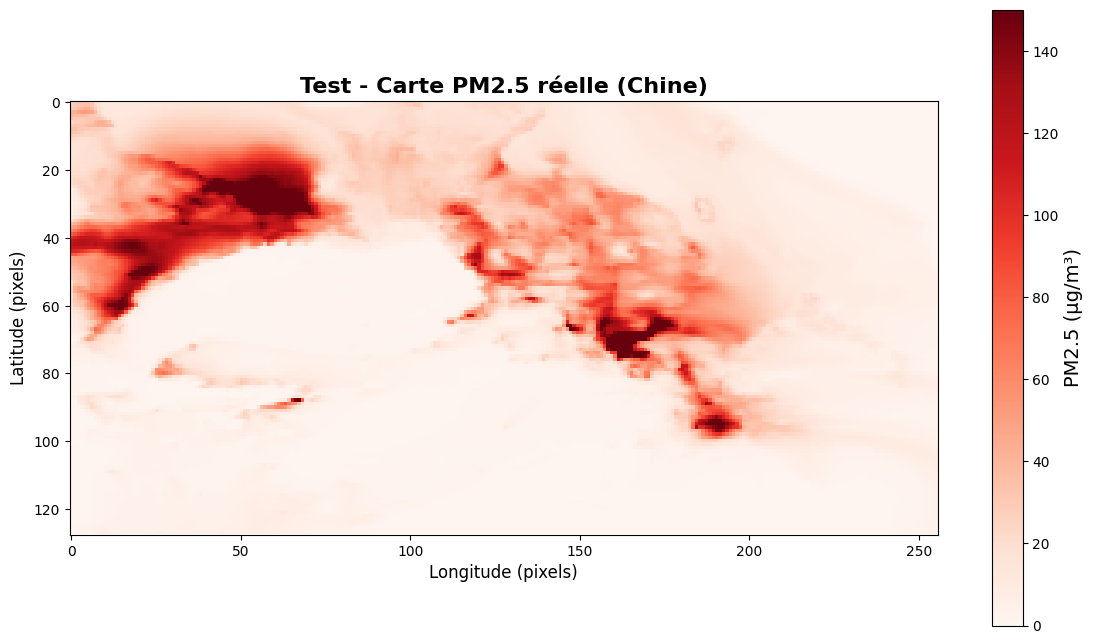

PM25: min=0.00, max=400.08 μg/m³
PM10: min=0.00, max=535.21 μg/m³
SO2: min=0.00, max=338.86 μg/m³
NO2: min=0.02, max=153.46 μg/m³
CO: min=0.00, max=10.42 mg/m³
O3: min=0.00, max=140.92 μg/m³


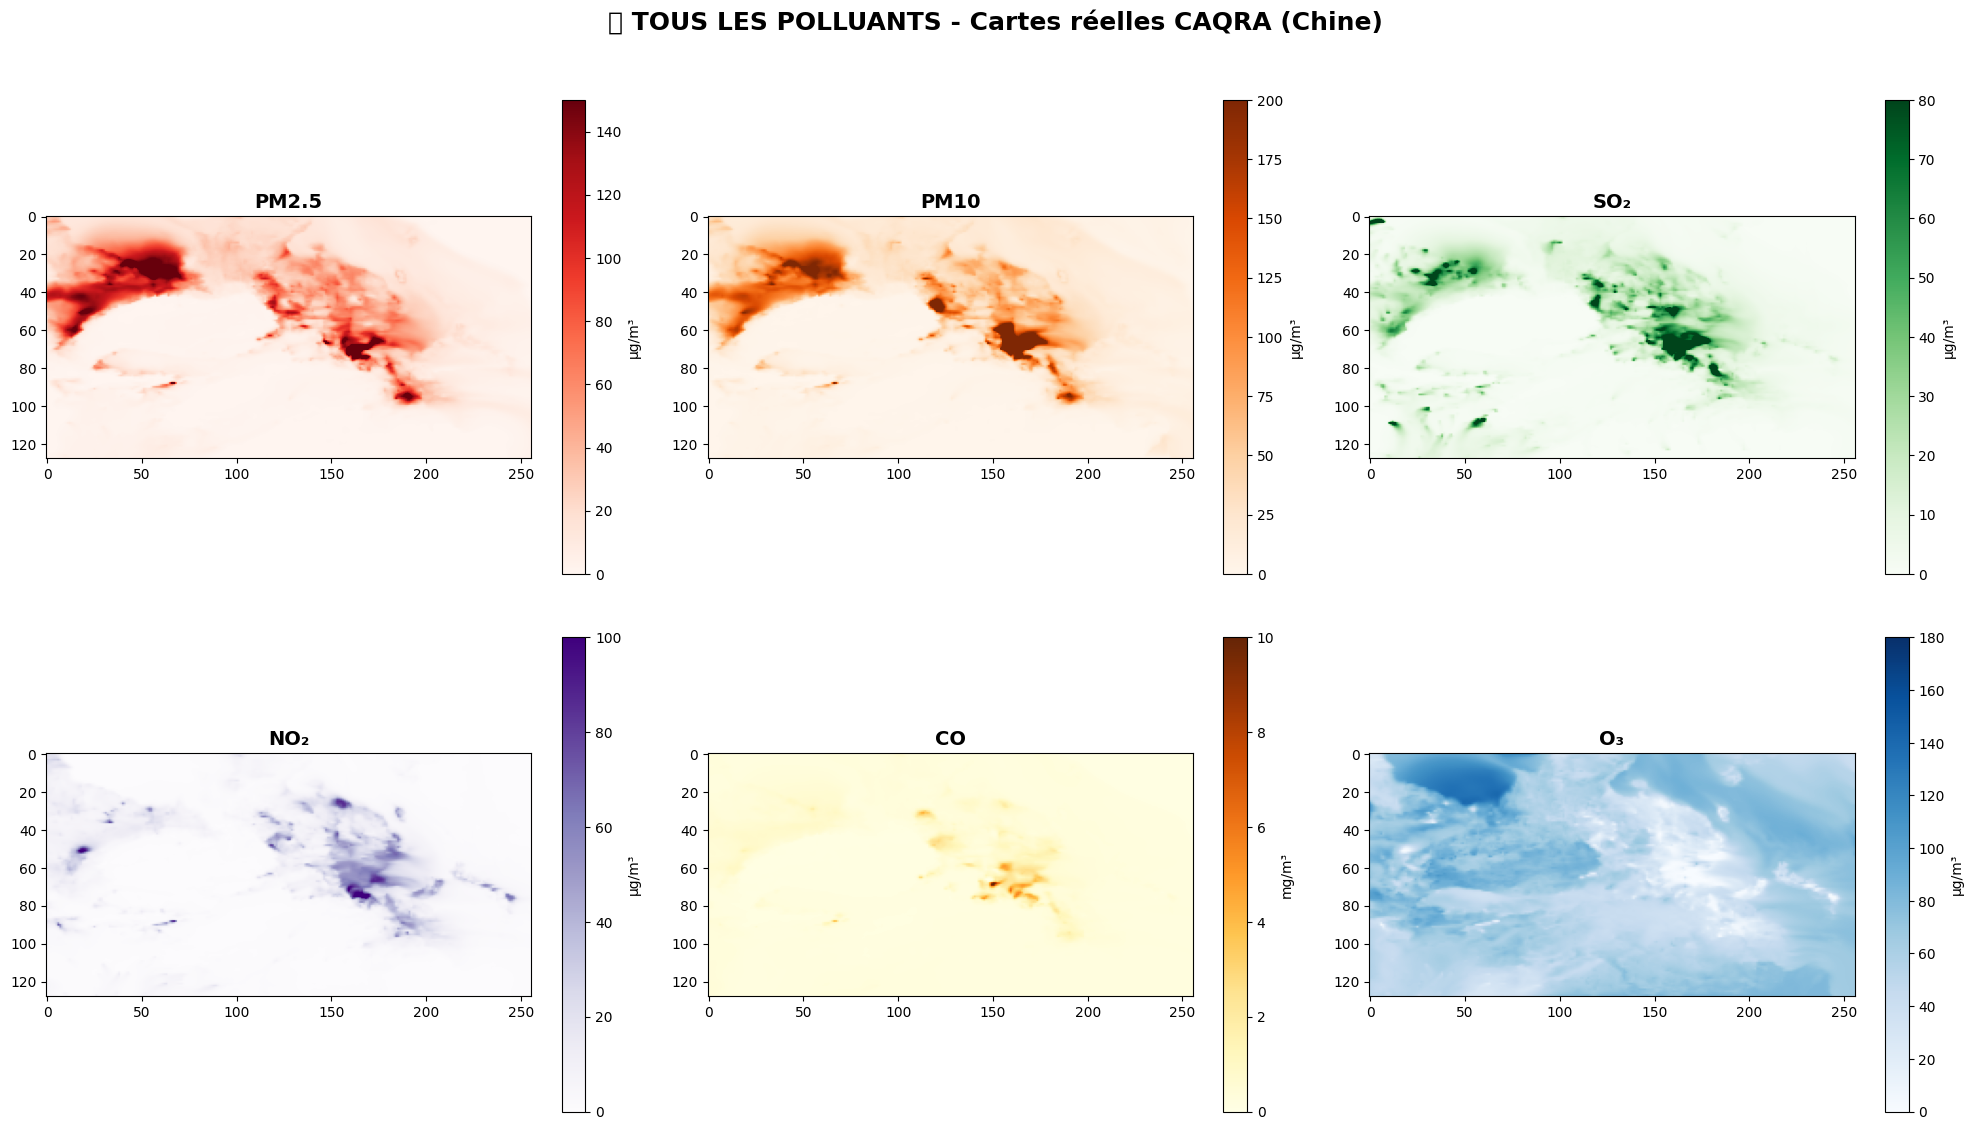

💾 Sauvegarde des cartes...
✅ outputs/cartes_jupyter/carte_pm25.png
✅ outputs/cartes_jupyter/carte_pm10.png
✅ outputs/cartes_jupyter/carte_so2.png
✅ outputs/cartes_jupyter/carte_no2.png
✅ outputs/cartes_jupyter/carte_co.png
✅ outputs/cartes_jupyter/carte_o3.png
✅ outputs/cartes_jupyter/GRILLE_tous_polluants.png

🎯 TERMINÉ ! Toutes vos cartes sont prêtes !


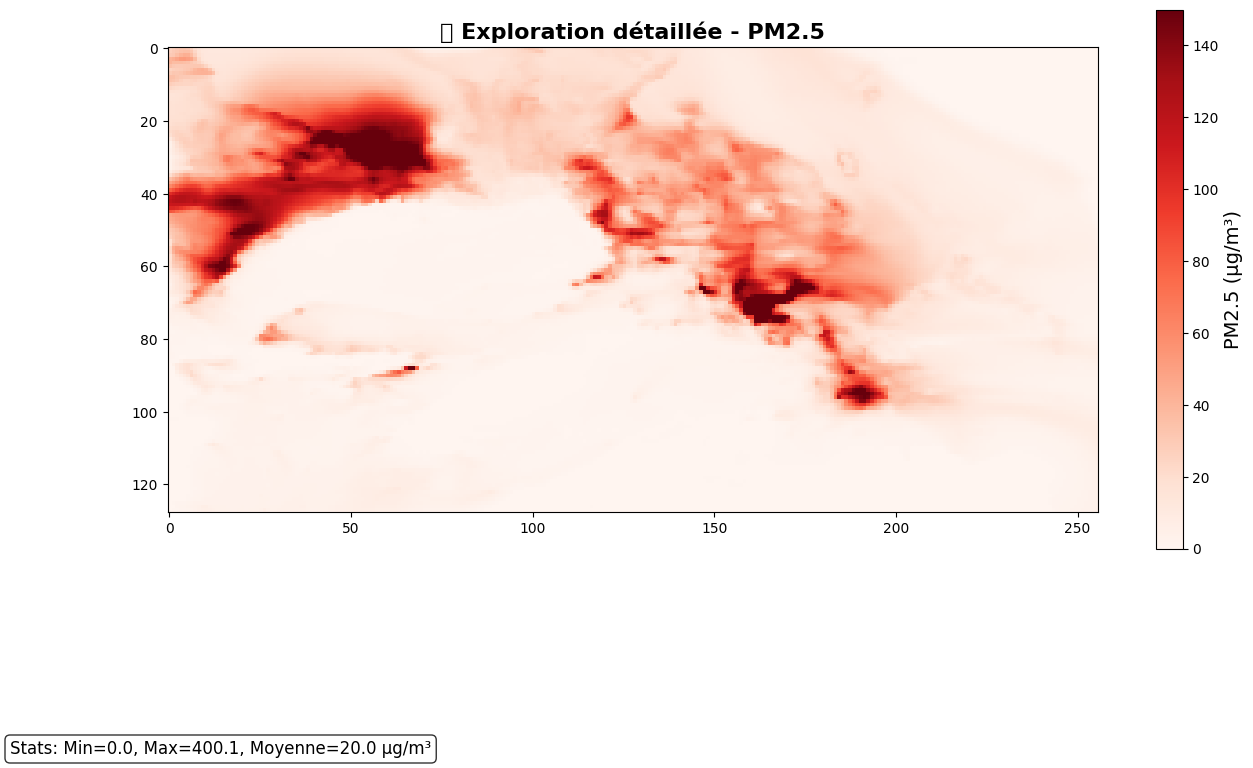

🎯 Vous regardez: PM2.5
💡 Changez "polluant_choisi" dans la cellule ci-dessus pour explorer les autres !


In [1]:
# %%
# === SETUP ET IMPORTS ===
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

# Ajouter les chemins
sys.path.append('data')
sys.path.append('climax/src')

print('Setup terminé')

# %%
# === CHARGER LES DONNÉES CAQRA ===
from caqra_dataloader import CAQRADataset

# Créer le dataset
dataset = CAQRADataset(
    data_path='/scratch/project_462000640/ammar/data_rossice/',
    years=[2013], 
    time_history=3, 
    time_future=6,
    target_resolution=(128, 256), 
    spatial_subsample=2, 
    normalize=False  # Garder les vraies valeurs
)

print(f' Dataset créé: {len(dataset)} échantillons')

# Prendre un échantillon
inputs, targets = dataset[0]
print(f'📊 Shapes: {inputs.shape} -> {targets.shape}')
print(f'📈 Input range: [{inputs.min():.2f}, {inputs.max():.2f}]')
print(f'🎯 Target range: [{targets.min():.2f}, {targets.max():.2f}]')

# %%
# === CONFIGURATION DES POLLUANTS ===
pollutant_config = {
    'pm25': {'cmap': 'Reds', 'unit': 'μg/m³', 'vmax': 150, 'name': 'PM2.5'},
    'pm10': {'cmap': 'Oranges', 'unit': 'μg/m³', 'vmax': 200, 'name': 'PM10'}, 
    'so2': {'cmap': 'Greens', 'unit': 'μg/m³', 'vmax': 80, 'name': 'SO₂'},
    'no2': {'cmap': 'Purples', 'unit': 'μg/m³', 'vmax': 100, 'name': 'NO₂'},
    'co': {'cmap': 'YlOrBr', 'unit': 'mg/m³', 'vmax': 10, 'name': 'CO'},
    'o3': {'cmap': 'Blues', 'unit': 'μg/m³', 'vmax': 180, 'name': 'O₃'}
}

pollutants = ['pm25', 'pm10', 'so2', 'no2', 'co', 'o3']
print('🎨 Configuration des couleurs prête')

# %%
# === CARTE INDIVIDUELLE PM2.5 (TEST) ===
plt.figure(figsize=(14, 10))

# Données PM2.5 (index 0)
pm25_map = targets[0, 0, :, :].numpy()

im = plt.imshow(pm25_map, cmap='Reds', origin='upper', vmin=0, vmax=150)
cbar = plt.colorbar(im, shrink=0.8)
cbar.set_label('PM2.5 (μg/m³)', fontsize=14)

plt.title('Test - Carte PM2.5 réelle (Chine)', fontsize=16, fontweight='bold')
plt.xlabel('Longitude (pixels)', fontsize=12)
plt.ylabel('Latitude (pixels)', fontsize=12)

print(f'📊 PM2.5 stats: min={pm25_map.min():.2f}, max={pm25_map.max():.2f}, mean={pm25_map.mean():.2f}')
plt.show()

# %%
# === GRILLE COMPLÈTE - TOUS LES POLLUANTS ===
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, var in enumerate(pollutants):
    config = pollutant_config[var]
    pollution_map = targets[0, i, :, :].numpy()
    
    # Créer la carte
    im = axes[i].imshow(pollution_map, cmap=config['cmap'], origin='upper',
                       vmin=0, vmax=config['vmax'])
    
    # Titre
    axes[i].set_title(f'{config["name"]}', fontsize=14, fontweight='bold')
    
    # Colorbar
    cbar = plt.colorbar(im, ax=axes[i], shrink=0.8)
    cbar.set_label(config['unit'], fontsize=10)
    
    # Stats
    print(f'{var.upper()}: min={pollution_map.min():.2f}, max={pollution_map.max():.2f} {config["unit"]}')

plt.suptitle(' TOUS LES POLLUANTS - Cartes réelles CAQRA (Chine)', 
             fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

# %%
# === SAUVEGARDER LES IMAGES ===
# Créer le dossier
os.makedirs('outputs/cartes_jupyter', exist_ok=True)

print('Sauvegarde des cartes...')

# Sauvegarder individuellement
for i, var in enumerate(pollutants):
    config = pollutant_config[var]
    pollution_map = targets[0, i, :, :].numpy()
    
    plt.figure(figsize=(12, 8))
    im = plt.imshow(pollution_map, cmap=config['cmap'], origin='upper',
                   vmin=0, vmax=config['vmax'])
    
    cbar = plt.colorbar(im, shrink=0.8)
    cbar.set_label(f'{config["name"]} ({config["unit"]})', fontsize=12)
    
    plt.title(f'Carte {config["name"]} - Données réelles CAQRA', 
              fontsize=14, fontweight='bold')
    
    filename = f'outputs/cartes_jupyter/carte_{var}.png'
    plt.savefig(filename, dpi=150, bbox_inches='tight')
    plt.close()
    
    print(f' {filename}')

# Sauvegarder la grille
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, var in enumerate(pollutants):
    config = pollutant_config[var]
    pollution_map = targets[0, i, :, :].numpy()
    
    im = axes[i].imshow(pollution_map, cmap=config['cmap'], origin='upper',
                       vmin=0, vmax=config['vmax'])
    axes[i].set_title(f'{config["name"]}', fontsize=14, fontweight='bold')
    
    cbar = plt.colorbar(im, ax=axes[i], shrink=0.8)
    cbar.set_label(config['unit'], fontsize=10)

plt.suptitle('Cartes de pollution - Données CAQRA Chine', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.savefig('outputs/cartes_jupyter/GRILLE_tous_polluants.png', dpi=150, bbox_inches='tight')
plt.close()

print(' outputs/cartes_jupyter/GRILLE_tous_polluants.png')
print('\ TERMINÉ ! Toutes vos cartes sont prêtes !')

# %%
# === EXPLORATION INTERACTIVE ===
# Choisir un polluant à explorer
polluant_choisi = 'pm25'  # Changez ici : pm25, pm10, so2, no2, co, o3
idx = pollutants.index(polluant_choisi)

config = pollutant_config[polluant_choisi]
carte = targets[0, idx, :, :].numpy()

plt.figure(figsize=(15, 10))
im = plt.imshow(carte, cmap=config['cmap'], origin='upper', vmin=0, vmax=config['vmax'])

# Colorbar détaillée
cbar = plt.colorbar(im, shrink=0.7)
cbar.set_label(f'{config["name"]} ({config["unit"]})', fontsize=14)

plt.title(f'🔍 Exploration détaillée - {config["name"]}', fontsize=16, fontweight='bold')

# Ajouter des stats
plt.figtext(0.02, 0.02, 
           f'Stats: Min={carte.min():.1f}, Max={carte.max():.1f}, Moyenne={carte.mean():.1f} {config["unit"]}',
           fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.show()

print(f' Vous regardez: {config["name"]}')
print(' Changez "polluant_choisi" dans la cellule ci-dessus pour explorer les autres !')

In [3]:
!rm -rf .git

In [5]:
!pwd

/pfs/lustrep1/scratch/project_462000640/ammar/rossice


In [6]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /pfs/lustrep1/scratch/project_462000640/ammar/rossice/.git/


In [7]:
with open(".gitignore", "w") as f:
    f.write("""# Environnements virtuels
venv/
env/
ENV/

# Fichiers Python temporaires
__pycache__/
*.py[cod]
*.so
*.egg
*.egg-info/
dist/
build/

# Jupyter
.ipynb_checkpoints/

# Logs et outputs
logs/
outputs/
*.log

# OS
.DS_Store
Thumbs.db

# Config perso
*.env
""")

In [8]:
!git add .
!git commit -m "Initial commit with .gitignore"
!git remote add origin https://github.com/AmmarKheder/rossice.git
!git push -u origin master

[master (root-commit) c7c111a] Initial commit with .gitignore
 111 files changed, 8840 insertions(+)
 create mode 100644 .gitignore
 create mode 100644 README.md
 create mode 100644 checkpoints/climax_1.40625deg.ckpt
 create mode 100644 climax/CODE_OF_CONDUCT.md
 create mode 100644 climax/LICENSE
 create mode 100644 climax/SECURITY.md
 create mode 100644 climax/SUPPORT.md
 create mode 100644 climax/configs/climate_projection.yaml
 create mode 100644 climax/configs/global_forecast_climax.yaml
 create mode 100644 climax/configs/pretrain_climax.yaml
 create mode 100644 climax/configs/regional_forecast_climax.yaml
 create mode 100644 climax/docker/Dockerfile
 create mode 100644 climax/docker/environment.yml
 create mode 100644 climax/docs/assets/images/climax-coverfigure.png
 create mode 100644 climax/docs/assets/images/climax-icon.png
 create mode 100644 climax/docs/assets/images/climax-logo.png
 create mode 100644 climax/docs/assets/images/gifs/t2m.gif
 create mode 100644 climax/docs/ass

In [9]:
!AmmarKheder

/bin/bash: line 1: AmmarKheder: command not found
